You may need to run all the cells each time you re-open the jupyter

In [3]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [28]:
T0 = 0.0 # Initial time
T = 100.0 # The total length of time
dt = 0.02 # time step
N = int(T / dt) + 1 # number of time steps
t = numpy.arange(T0, T+dt, dt) # time grid (challenge)
t_temp = numpy.linspace(T0, T, num=N) # reference
display(t) # double check the length of time grid
display(t_temp)

array([0.000e+00, 2.000e-02, 4.000e-02, ..., 9.996e+01, 9.998e+01,
       1.000e+02])

array([0.000e+00, 2.000e-02, 4.000e-02, ..., 9.996e+01, 9.998e+01,
       1.000e+02])

Initial Conditions:

In [5]:
z0 = 100.0 # altitude
b0 = 10.0  # upward velocity resulting from gust
zt = 100.0 # trim altitude
g = 9.81   # gravity

In [7]:
u = numpy.array([z0, b0]) # initial condition array
display(u)

array([100.,  10.])

In [10]:
z = numpy.zeros(N) # new array filled by zeros, to store values
z[0] = z0 # assign value

Euler's Method:

In [12]:
for n in range(1, N):
    rhs = numpy.array([u[1], g * (1 - u[0] / zt)])
    u = u + dt * rhs # one step forward
    z[n] = u[0] # assign value to the array
display(z)

array([100.        ,  96.86428993,  97.08403227, ...,  92.15439132,
        92.39272035,  92.63135725])

Plot:

In [13]:
# prepare
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

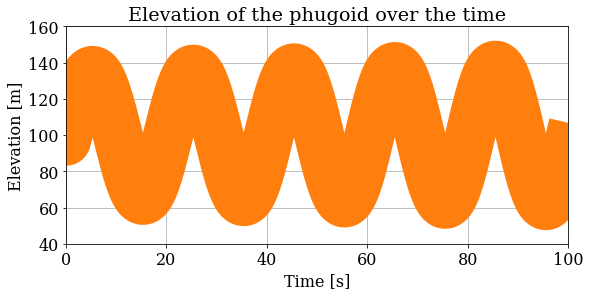

In [24]:
# plot
pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
pyplot.title('Elevation of the phugoid over the time')  # set the title
pyplot.xlabel('Time [s]')  # set the x-axis label
pyplot.ylabel('Elevation [m]')  # set the y-axis label
pyplot.xlim(t[0], t[-1])  # set the x-axis limits
pyplot.ylim(40.0, 160.0)  # set the y-axis limits
pyplot.grid()  # set a background grid to improve readability
pyplot.plot(t, z, color='C1', linestyle='-', linewidth=50);

In [25]:
# compute exact solution
z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5 * t) + (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)

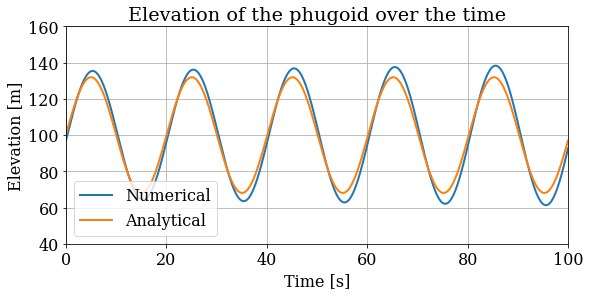

In [27]:
# plot again with exact solution
pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
pyplot.title('Elevation of the phugoid over the time')  # set the title
pyplot.xlabel('Time [s]')  # set the x-axis label
pyplot.ylabel('Elevation [m]')  # set the y-axis label
pyplot.xlim(t[0], t[-1])  # set the x-axis limits
pyplot.ylim(40.0, 160.0)  # set the y-axis limits
pyplot.grid()  # set a background grid to improve readability
pyplot.plot(t, z, label='Numerical', color='C0', linestyle='-', linewidth=2)
pyplot.plot(t, z_exact, label='Analytical', color='C1', linestyle='-', linewidth=2)
pyplot.legend();  # set the legend

Chapter Convergence

In [32]:
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001] # time steps
z_values = [] # empty array
for dt in dt_values:
    N = int(T / dt) + 1  # number of time-steps
    t = numpy.linspace(0.0, T, num=N)  # time grid
    # Set the initial conditions.
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    # Temporal integration using Euler's method.
    for n in range(1, N):
        rhs = numpy.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt * rhs
        z[n] = u[0]  # store the elevation at time-step n+1
    z_values.append(z)  # store the elevation over the time

Compute error:

In [34]:
def l1_error(z, z_exact, dt):
    """
    Computes and returns the error
    (between the numerical and exact solutions)
    in the L1 norm.
    
    Parameters
    ----------
    z : numpy.ndarray
        The numerical solution as an array of floats.
    z_exact : numpy.ndarray
        The analytical solution as an array of floats.
    dt : float
        The time-step size.
        
    Returns
    -------
    error: float
        L1-norm of the error with respect to the exact solution.
    """
    error = dt * numpy.sum(numpy.abs(z - z_exact))
    return error

In [35]:
error_values = []
# compute error
for z, dt in zip(z_values, dt_values):
    N = int(T / dt) + 1  # number of time-steps
    t = numpy.linspace(0.0, T, num=N)  # time grid
    # Compute the exact solution.
    z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5 * t) +
               (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)
    # Calculate the L1-norm of the error for the present time grid.
    error_values.append(l1_error(z, z_exact, dt))

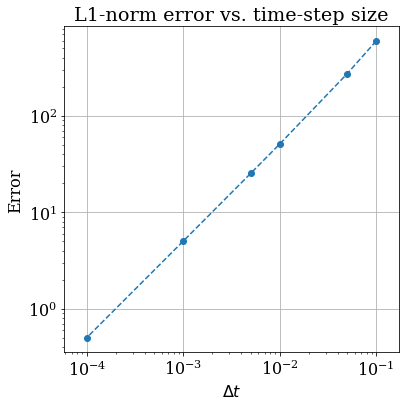

In [36]:
# plot error
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm error vs. time-step size')  # set the title
pyplot.xlabel('$\Delta t$')  # set the x-axis label
pyplot.ylabel('Error')  # set the y-axis label
pyplot.grid()
pyplot.loglog(dt_values, error_values, color='C0', linestyle='--', marker='o')  # log-log plot
pyplot.axis('equal');  # make axes scale equally

### Challenge II

In [47]:
def EulerMethod(dt, z0, b0, T):
    N = int(T / dt) + 1  # number of time-steps
    t = numpy.linspace(0.0, T, num=N)  # time grid
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    for n in range(1, N):
        rhs = numpy.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt * rhs
        z[n] = u[0]  # store the elevation at time-step n+1
    z_values.append(z)  # store the elevation over the time
    return z

In [48]:
dt2 = 0.1 # set time steps
output = EulerMethod(dt2, z0, b0, T)
display(output)

array([100.        , 101.        , 102.        , ...,  91.2989138 ,
        92.90712607,  94.5238741 ])

ValueError: x and y must have same first dimension, but have shapes (1000001,) and (1001,)

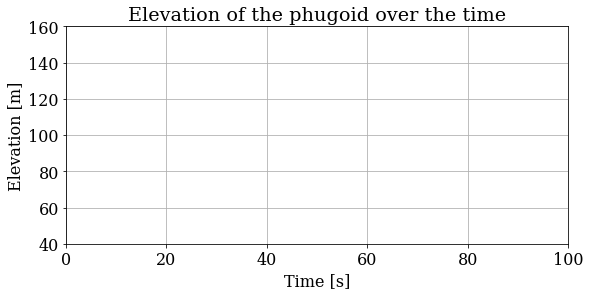

In [50]:
# plot later
pyplot.figure(figsize=(9.0, 4.0))  # set the size of the figure
pyplot.title('Elevation of the phugoid over the time')  # set the title
pyplot.xlabel('Time [s]')  # set the x-axis label
pyplot.ylabel('Elevation [m]')  # set the y-axis label
pyplot.xlim(t[0], t[-1])  # set the x-axis limits
pyplot.ylim(40.0, 160.0)  # set the y-axis limits
pyplot.grid()  # set a background grid to improve readability
pyplot.plot(t, output, color='C1', linestyle='-', linewidth=20);